In [174]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

In [175]:
data = datasets.load_breast_cancer()
breast_cancer_df = shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']))
X = breast_cancer_df.drop('target', axis=1)
y = breast_cancer_df['target']

<AxesSubplot: xlabel='worst area', ylabel='worst concave points'>

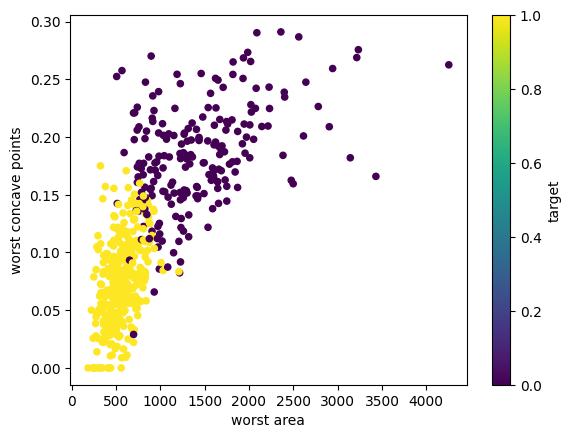

In [176]:
breast_cancer_df.plot.scatter(x='worst area', y='worst concave points', c='target', colormap='viridis')

<AxesSubplot: xlabel='area error', ylabel='concavity error'>

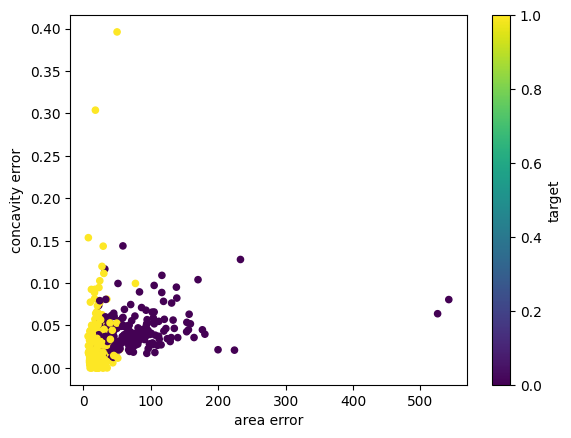

In [177]:
breast_cancer_df.plot.scatter(x='area error', y='concavity error', c='target', colormap='viridis')

<AxesSubplot: xlabel='concave points error', ylabel='mean concave points'>

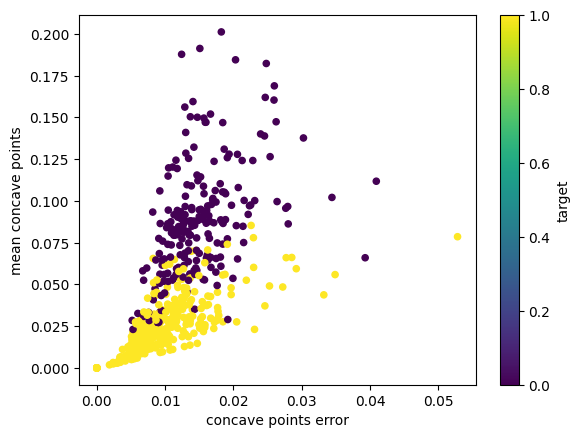

In [178]:
breast_cancer_df.plot.scatter(x='concave points error', y='mean concave points', c='target', colormap='viridis')

<AxesSubplot: >

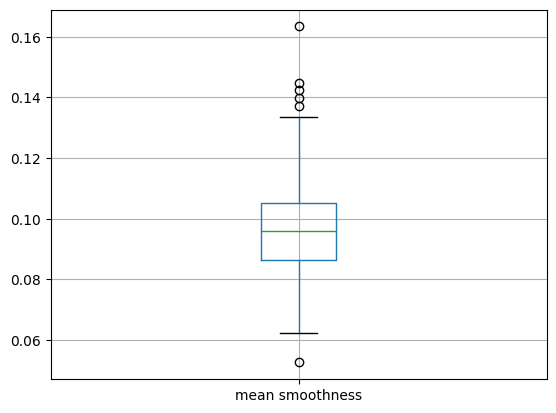

In [179]:
breast_cancer_df.boxplot(column=['mean smoothness'])

<AxesSubplot: >

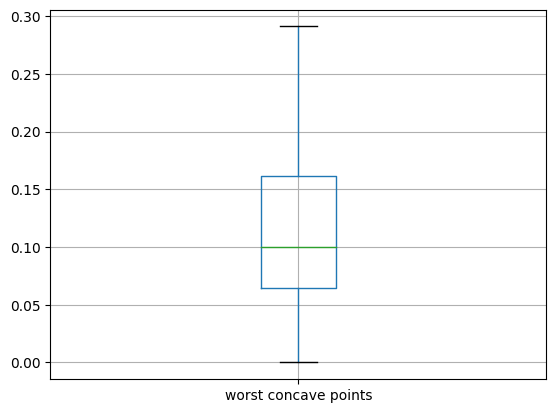

In [180]:
breast_cancer_df.boxplot(column=['worst concave points'])

<AxesSubplot: >

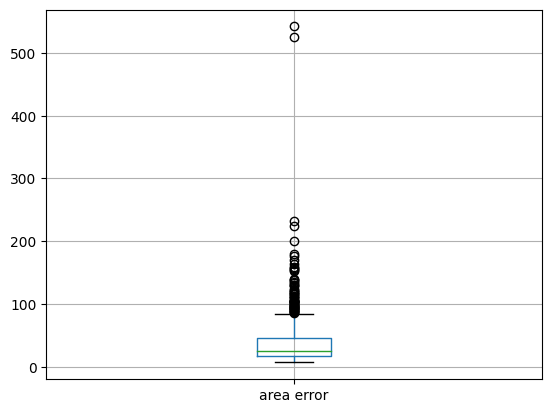

In [181]:
breast_cancer_df.boxplot(column=['area error'])

<AxesSubplot: >

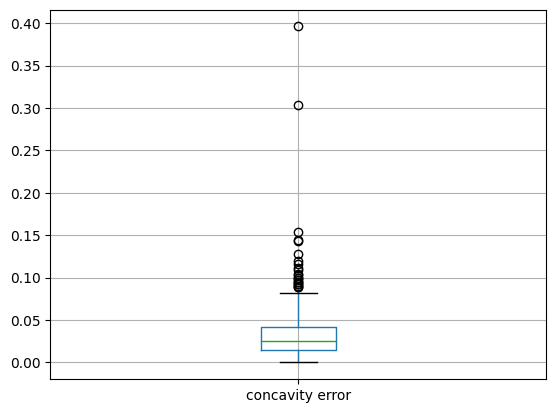

In [182]:
breast_cancer_df.boxplot(column=['concavity error'])

<AxesSubplot: >

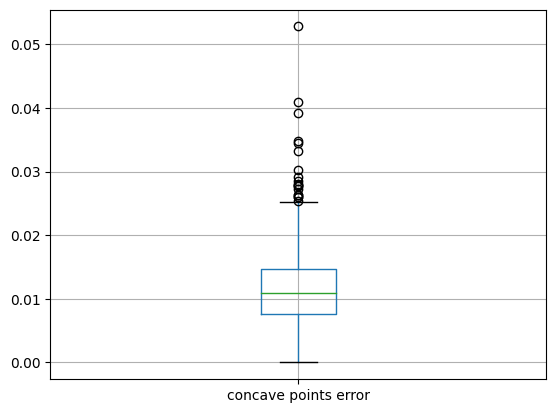

In [183]:
breast_cancer_df.boxplot(column=['concave points error'])

In [184]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.027550,0.1769,0.06270,...,16.18,78.27,457.5,0.13580,0.1507,0.12750,0.08750,0.2733,0.08022,1.0
231,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,0.05628,...,33.75,79.82,452.3,0.09203,0.1432,0.10890,0.02083,0.2849,0.07087,1.0
121,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.086650,0.1966,0.06213,...,24.90,145.40,1549.0,0.15030,0.2291,0.32720,0.16740,0.2894,0.08456,0.0
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.023770,0.1829,0.05667,...,22.00,90.81,600.6,0.10970,0.1506,0.17640,0.08235,0.3024,0.06949,1.0
310,11.70,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.011480,0.1936,0.06128,...,26.55,80.92,483.1,0.12230,0.1087,0.07915,0.05741,0.3487,0.06958,1.0


In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

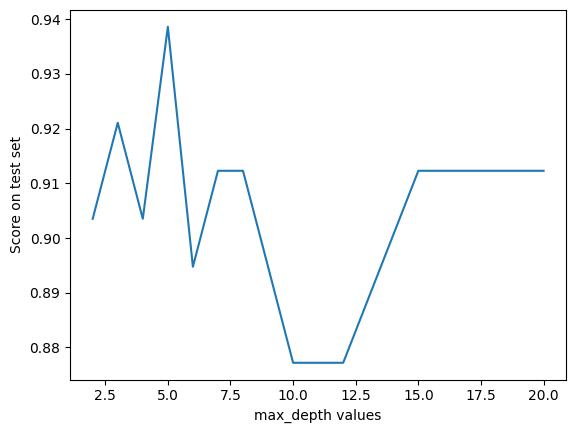

In [186]:
mdepths = [2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20]
scores = np.zeros(len(mdepths))
index=0

for d in mdepths:
    tree_classi = DecisionTreeClassifier(max_depth=d, min_samples_split=5)
    tree_classi.fit(X_train,y_train)
    u=tree_classi.score(X_test,y_test)
    scores[index]=u
    index+=1

best_option = max(scores)
for i in range(len(mdepths)):
    if scores[i] == best_option:
        best_option = mdepths[i]
        break

pyplot.plot(mdepths, scores)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

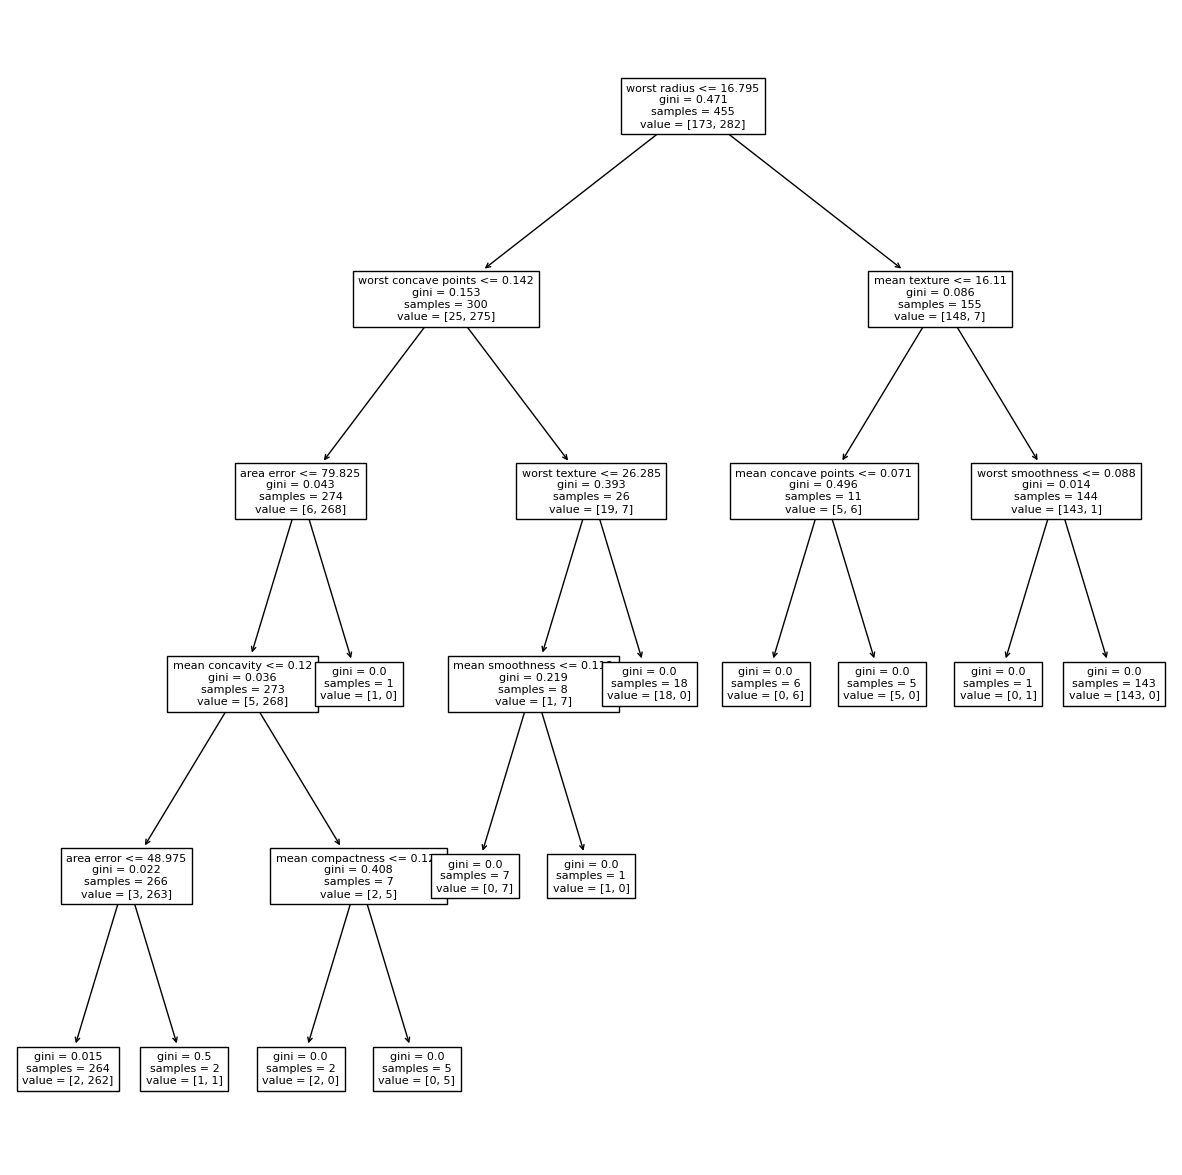

In [187]:
from sklearn import tree as tr
tree = DecisionTreeClassifier(max_depth=best_option)
tree.fit(X_train, y_train)
pyplot.figure(figsize=(15,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=8)  
pyplot.show()

In [188]:
tree.score(X_test, y_test)

0.9210526315789473

In [189]:
log_reg= LogisticRegression(C=0.01, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9298245614035088

In [190]:
if log_reg.score(X_test, y_test) > tree.score(X_test, y_test):
    print("Logistic Regression is better.")
else: 
    print("Decision Tree is better.")

Logistic Regression is better.


In [191]:
#https://www.youtube.com/watch?v=7v4Qdm5v9aA&t=235s&ab_channel=Codegnan took from this video. Tree.feature_importances_ gives it too but video helped me about turning it into dataframe.
breast_cancer_df_train = pd.DataFrame({'Feature names': X.columns, 'Importance': tree.feature_importances_})
breast_cancer_df_train.sort_values(by='Importance', ascending=False, inplace=True)

In [192]:
breast_cancer_df_train.head()

,Feature names,Importance
20,worst radius,0.741107
27,worst concave points,0.113930
21,worst texture,0.040486
1,mean texture,0.028295
7,mean concave points,0.026039


Logistic regression's score is higher than decision tree's score.

In [193]:
#reference: https://www.w3schools.com/python/pandas/pandas_csv.asp
wine_df = pd.read_csv('winequality_white.csv', sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [194]:
X = wine_df[wine_df.columns[0:11]]
y = wine_df['quality']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [205]:
def best_(min_sample_split_,X_train_,y_train_,X_test_,y_test_):
    mdepths = [2,4,5,6,7,9,10,18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,41,42,43,44]
    scores = list(np.zeros(len(mdepths)))
    index=0

    for d in mdepths:
        tree_reg_ = DecisionTreeRegressor(max_depth=d, min_samples_split=min_sample_split_, random_state=0)
        tree_reg_.fit(X_train_, y_train_)
        u=tree_reg_.score(X_test_, y_test_)
        scores[index]=u
        index+=1

    best_option = max(scores)
    for i in range(len(mdepths)):
        if scores[i] == best_option:
            best_option = mdepths[i]
            break

    return best_option,u
    

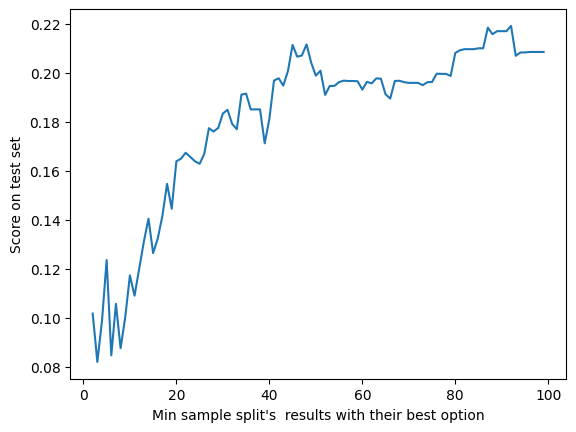

Best depth which worked best: 5 
Min sample which worked best: 92


In [206]:
#my code here finds the best min sample split and depth option
array_score= list(np.zeros(100))
array_best=list(np.zeros(100))

for i in range(2,100): 
    array_best[i] , array_score[i] = best_(i,X_train,y_train,X_test,y_test)
best_score_general = max(array_score)
index_best_s= list(array_score).index(best_score_general)
pyplot.plot(range(2,100), array_score[2:])
pyplot.xlabel("Min sample split's  results with their best option")
pyplot.ylabel('Score on test set')
pyplot.show()
print("Best depth which worked best:",array_best[index_best_s],"\nMin sample which worked best:", index_best_s)

In [208]:
tree_reg = DecisionTreeRegressor(max_depth=array_best[index_best_s],min_samples_split= index_best_s,random_state=0)
tree_reg.fit(X_train, y_train)
#pyplot.figure(figsize=(15,15))
#tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=8)  
#pyplot.show()

DecisionTreeRegressor(max_depth=5, min_samples_split=92, random_state=0)

In [209]:
y_pred = tree_reg.predict(X_test)
sum_mse=0
for i in range(0, len(y_pred)):
    sum_mse += (y_pred[i] - y_test.iloc[i]) ** 2
print("Mean squared error:",(sum_mse/len(y_pred)))
print("Score:", tree_reg.score(X_test,y_test))
#print(mean_squared_error(y_test,y_pred))

Mean squared error: 0.6274142626814673
Score: 0.2503574760648313
